# The First Stars: Formation under X-ray Feedback -- Phase Diagrams

This notebook generates all simulation results figures for my current paper.  All simulations run on stampede.tacc.utexas.edu

In [1]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
mpl.rc('font', size=20.)
mpl.rc('font', family='serif')
mpl.rc('text', usetex=True)
import pyGadget

In [2]:
simV = pyGadget.sim.Simulation('stampede/vanilla',length='pc')
sim0 = pyGadget.sim.Simulation('stampede/xr_tau_J0',length='pc')
sim1 = pyGadget.sim.Simulation('stampede/xr_tau_J1',length='pc')
sim2 = pyGadget.sim.Simulation('stampede/xr_tau_J2',length='pc')
sim3 = pyGadget.sim.Simulation('stampede/xr_tau_J3',length='pc')
sim4 = pyGadget.sim.Simulation('stampede/XR_sfr_1e-3',length='pc')
sim5 = pyGadget.sim.Simulation('stampede/XR_sfr_1e-2',length='pc')
sim6 = pyGadget.sim.Simulation('stampede/XR_sfr_1e-1',length='pc')
sim7 = pyGadget.sim.Simulation('stampede/XR_sfr_1e-0',length='pc')
sims = [simV, sim0, sim1, sim2, sim3, sim4, sim5, sim6, sim7]

In [3]:
simname = {'vanilla':r'J = 0',
        'xr_tau_J0': r'J = J$_{0}$', 
        'xr_tau_J1': r'J = 10 J$_{0}$', 
        'xr_tau_J2': r'J = 10$^2$ J$_{0}$',
        'xr_tau_J3': r'J = 10$^3$ J$_{0}$'}
name = ['vanilla', 'xr_tau_J0', 'xr_tau_J1', 'xr_tau_J2', 'xr_tau_J3', 'XR_sfr_1e-3', 'XR_sfr_1e-2', 'XR_sfr_1e-1', 'XR_sfr_1e-0']

In [4]:
#n0, n1, n2, n3, tag = 100, 102, 202, 135, '_z26'
#n0, n1, n2, n3, tag = 615, 609, 236, 277, ''
#n0, n1, n2, n3, tag = 355, 269, 201, 200, '_t0'
nV, n0, n1, n2, n3, n4, n5, n6, n7, tag = 355, 306, 327, 271, 235, 269, 201, 200, 112, '_tau0'
#n0, n1, n2, n3, tag = 665, 575, 502, 501, '_t1k'
#n0, n1, n2, n3, tag = 974, 880, 802, 800, '_t2k'
#n0, n1, n2, n3, tag = 1128, 1032, 951, 950, '_t2500'
#n0, n1, n2, n3, tag = 1283, 1184, 1100, 1100, '_t3k'
#n0, n1, n2, n3, tag = 1437, 1337, 1251, 1250, '_t3500'
#n0, n1, n2, n3, tag = 1592, 1489, 1401, 1400, '_t4k'
#n0, n1, n2, n3, tag = 1900, 1794, 1701, 1700, '_t5k'
ns = [nV, n0, n1, n2, n3, n4, n5, n6, n7]

In [5]:
snaps = {}
for i, (sim, n) in enumerate(zip(sims, ns)):
    s = sim.load_snapshot(n, 'ndensity', 'temp', 'h2frac', 'HDfrac', 'electron_frac')#, 'coordinates')#,stride=1e5)
    s.gas.cleanup('ndensity', 'temp', 'h2frac', 'HDfrac', 'electron_frac')#, 'coordinates')
    snaps[name[i]] = s

Turning on gas particle refinement.
There are 8000000 highest resolution particles.
Loading data...
Turning on gas particle refinement.
There are 8000000 highest resolution particles.
Loading data...
Turning on gas particle refinement.
There are 8000000 highest resolution particles.
Loading data...
Turning on gas particle refinement.
There are 8000000 highest resolution particles.
Loading data...
Turning on gas particle refinement.
There are 8000000 highest resolution particles.
Loading data...
Turning on gas particle refinement.
There are 8000000 highest resolution particles.
Loading data...
Turning on gas particle refinement.
There are 8000000 highest resolution particles.
Loading data...
Turning on gas particle refinement.
There are 8000000 highest resolution particles.
Loading data...
Turning on gas particle refinement.
There are 8000000 highest resolution particles.
Loading data...


## Density - Temperature phase diagram

In [6]:
shielded = [snaps[i] for i in name[1:5]]
unshielded = [snaps[i] for i in name[5:]]

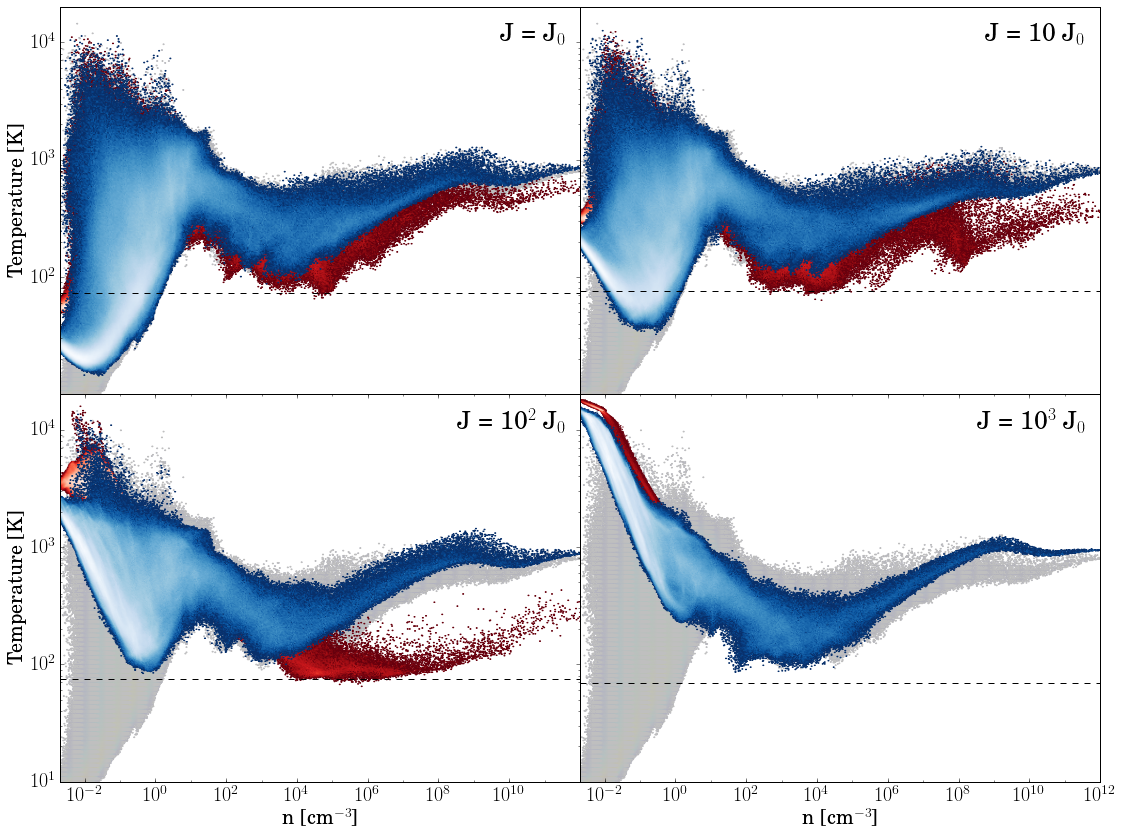

In [7]:
fig,axes = plt.subplots(2, 2, figsize=(16,12))
axes = axes.flatten()
sV = snaps['vanilla']
for i, (ax, s1,s2) in enumerate(zip(axes,unshielded,shielded)):
    ax = pyGadget.multiplot.Phase.temp(sV, ax, rasterized=True, color='.75', cmbline=False)
    ax = pyGadget.multiplot.Phase.temp(s1,ax, rasterized=True, cmap=plt.cm.Reds_r)
    ax = pyGadget.multiplot.Phase.temp(s2,ax, rasterized=True, cmap=plt.cm.Blues_r, cmbline=False)
    ax.text(.97,.95, simname[name[i+1]], ha='right', va='top', size=25, transform=ax.transAxes)

ax0,ax1,ax2,ax3 = axes
ax0.xaxis.set_visible(False)
ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)
ax3.yaxis.set_visible(False)
ax2.set_xticks((1e-2,1e0,1e2,1e4,1e6,1e8,1e10))
ax3.set_xticks((1e-2,1e0,1e2,1e4,1e6,1e8,1e10,1e12))
ax0.set_yticks((1e2,1e3,1e4))
ax2.set_yticks((10,1e2,1e3,1e4))

fig.tight_layout(w_pad=0.0,h_pad=0.0)
fig.savefig('figures/phase_diagrams/temp'+tag+'.png', bbox_inches='tight')

## H2 molecular fraction - density phase diagram

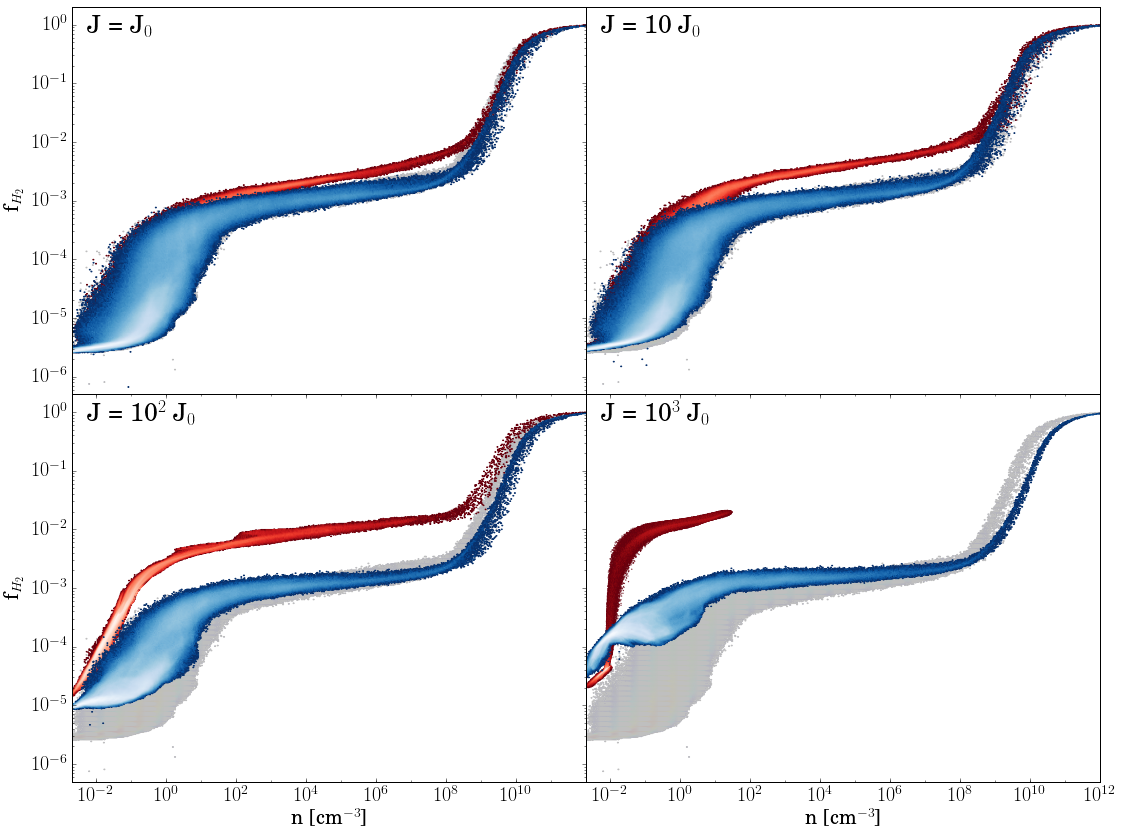

In [8]:
fig,axes = plt.subplots(2, 2, figsize=(16,12))
axes = axes.flatten()
sV = snaps['vanilla']
for i, (ax, s1,s2) in enumerate(zip(axes,unshielded,shielded)):
    ax = pyGadget.multiplot.Phase.h2frac(sV, ax, rasterized=True, color='.75')
    ax = pyGadget.multiplot.Phase.h2frac(s1,ax, rasterized=True, cmap=plt.cm.Reds_r)
    ax = pyGadget.multiplot.Phase.h2frac(s2,ax, rasterized=True, cmap=plt.cm.Blues_r)
    ax.text(.03,.97, simname[name[i+1]], ha='left', va='top', size=25, transform=ax.transAxes)

ax0,ax1,ax2,ax3 = axes
ax0.xaxis.set_visible(False)
ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)
ax3.yaxis.set_visible(False)
ax2.set_xticks((1e-2,1e0,1e2,1e4,1e6,1e8,1e10))
ax3.set_xticks((1e-2,1e0,1e2,1e4,1e6,1e8,1e10,1e12))

plt.tight_layout(w_pad=0.0,h_pad=0.0)
fig.savefig('figures/phase_diagrams/H2'+tag+'.png', bbox_inches='tight')

## HD molecular fraction - density phase diagram

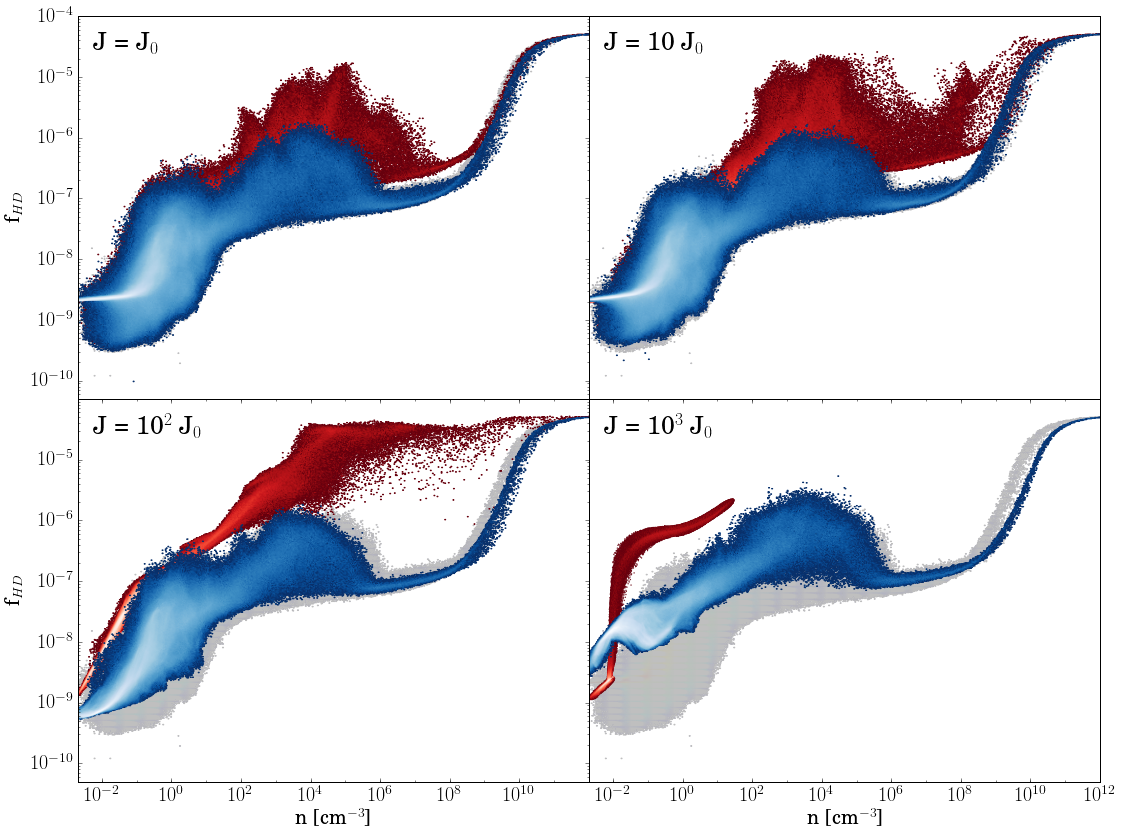

In [9]:
fig,axes = plt.subplots(2, 2, figsize=(16,12))
axes = axes.flatten()
sV = snaps['vanilla']
for i, (ax, s1,s2) in enumerate(zip(axes,unshielded,shielded)):
    ax = pyGadget.multiplot.Phase.HDfrac(sV, ax, rasterized=True, color='.75')
    ax = pyGadget.multiplot.Phase.HDfrac(s1,ax, rasterized=True, cmap=plt.cm.Reds_r)
    ax = pyGadget.multiplot.Phase.HDfrac(s2,ax, rasterized=True, cmap=plt.cm.Blues_r)
    ax.text(.03,.95, simname[name[i+1]], ha='left', va='top', size=25, transform=ax.transAxes)

ax0,ax1,ax2,ax3 = axes
ax0.xaxis.set_visible(False)
ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)
ax3.yaxis.set_visible(False)
ax2.set_xticks((1e-2,1e0,1e2,1e4,1e6,1e8,1e10))
ax3.set_xticks((1e-2,1e0,1e2,1e4,1e6,1e8,1e10,1e12))
ax2.set_yticks((1e-10,1e-9,1e-8,1e-7,1e-6,1e-5))

plt.tight_layout(w_pad=0.0,h_pad=0.0)
fig.savefig('figures/phase_diagrams/HD'+tag+'.png', bbox_inches='tight')

## Electron fraction - density phase diagram

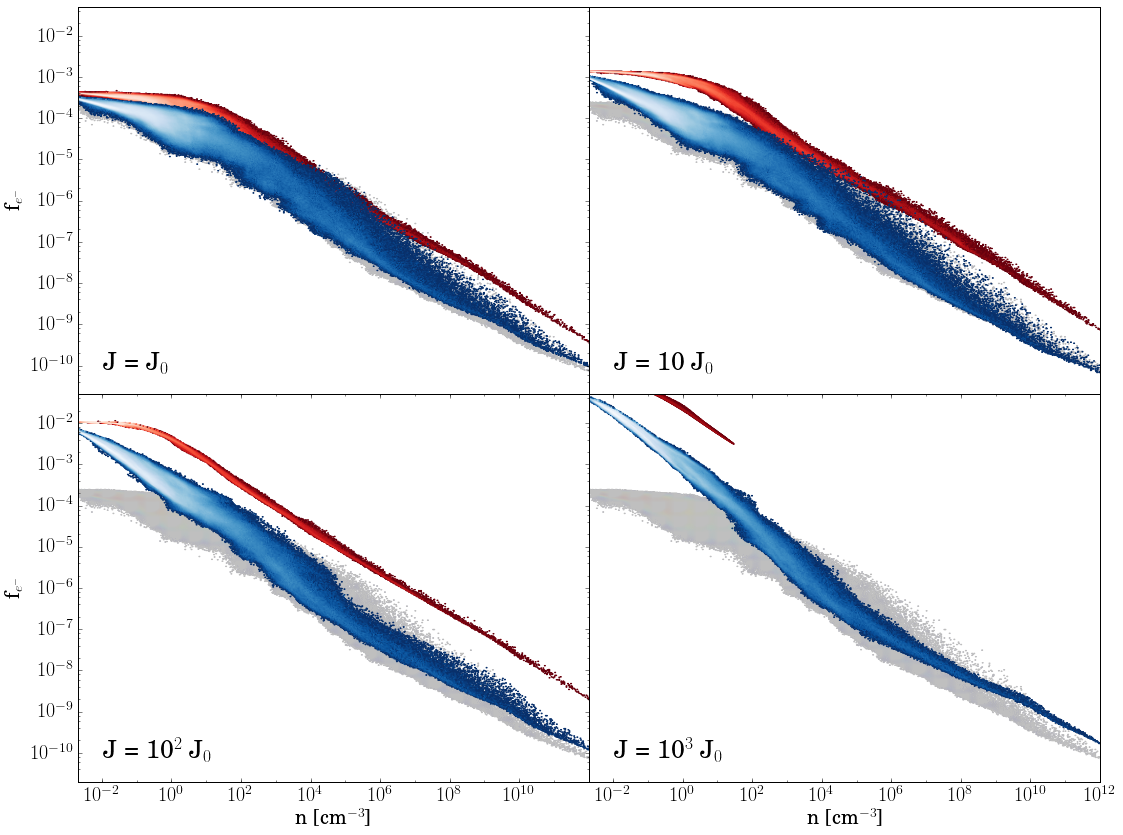

In [10]:
fig,axes = plt.subplots(2, 2, figsize=(16,12))
axes = axes.flatten()
sV = snaps['vanilla']
for i, (ax, s1,s2) in enumerate(zip(axes,unshielded,shielded)):
    ax = pyGadget.multiplot.Phase.electron_frac(sV, ax, rasterized=True, color='.75')
    ax = pyGadget.multiplot.Phase.electron_frac(s1,ax, rasterized=True, cmap=plt.cm.Reds_r)
    ax = pyGadget.multiplot.Phase.electron_frac(s2,ax, rasterized=True, cmap=plt.cm.Blues_r)
    ax.text(.05,.1, simname[name[i+1]], ha='left', va='top', size=25, transform=ax.transAxes)

ax0,ax1,ax2,ax3 = axes
ax0.xaxis.set_visible(False)
ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)
ax3.yaxis.set_visible(False)
ax2.set_xticks((1e-2,1e0,1e2,1e4,1e6,1e8,1e10))
ax3.set_xticks((1e-2,1e0,1e2,1e4,1e6,1e8,1e10,1e12))
#ax2.set_yticks((1e-10,1e-9,1e-8,1e-7,1e-6,1e-5))

plt.tight_layout(w_pad=0.0,h_pad=0.0)
fig.savefig('figures/phase_diagrams/elec'+tag+'.png', bbox_inches='tight')

## Electron fraction - overlay

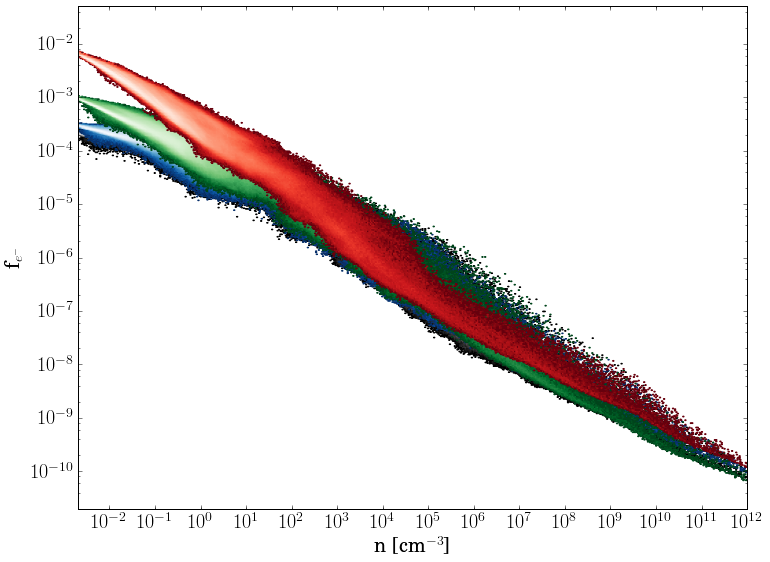

In [10]:
fig = plt.figure(3, figsize=(12,9))
ax = fig.add_subplot(111)
ax = pyGadget.multiplot.Phase.electron_frac(snapV,ax, cmap=plt.cm.Greys_r, rasterized=True)
ax = pyGadget.multiplot.Phase.electron_frac(snap1,ax, cmap=plt.cm.Blues_r, rasterized=True)
ax = pyGadget.multiplot.Phase.electron_frac(snap2,ax, cmap=plt.cm.Greens_r, rasterized=True)
ax = pyGadget.multiplot.Phase.electron_frac(snap3,ax, cmap=plt.cm.Reds_r, rasterized=True)

#ax0.text(.05,.1, r'J = 0', ha='left', va='top', size=25, transform=ax0.transAxes)
#ax1.text(.05,.1, r'J = J$_{0}$', ha='left', va='top', size=25, transform=ax1.transAxes)
#ax2.text(.05,.1, r'J = 10 J$_{0}$', ha='left', va='top', size=25, transform=ax2.transAxes)
#ax3.text(.05,.1, r'J = 100 J$_{0}$', ha='left', va='top', size=25, transform=ax3.transAxes)

fig.savefig('figures/phase_diagrams/elec-overlay'+tag+'.png', bbox_inches='tight')

## H2 fraction - overlay

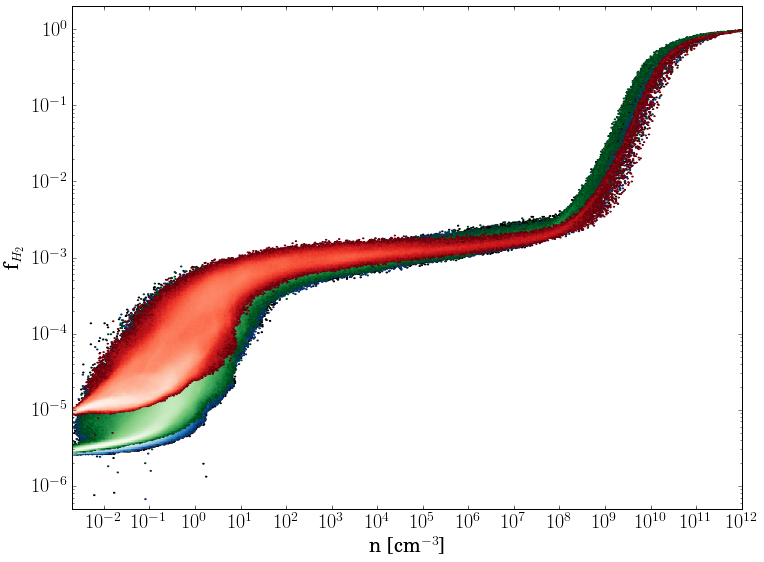

In [11]:
fig = plt.figure(3, figsize=(12,9))
ax = fig.add_subplot(111)
ax = pyGadget.multiplot.Phase.h2frac(snapV,ax, cmap=plt.cm.Greys_r, rasterized=True)
ax = pyGadget.multiplot.Phase.h2frac(snap1,ax, cmap=plt.cm.Blues_r, rasterized=True)
ax = pyGadget.multiplot.Phase.h2frac(snap2,ax, cmap=plt.cm.Greens_r, rasterized=True)
ax = pyGadget.multiplot.Phase.h2frac(snap3,ax, cmap=plt.cm.Reds_r, rasterized=True)

#ax0.text(.05,.1, r'J = 0', ha='left', va='top', size=25, transform=ax0.transAxes)
#ax1.text(.05,.1, r'J = J$_{0}$', ha='left', va='top', size=25, transform=ax1.transAxes)
#ax2.text(.05,.1, r'J = 10 J$_{0}$', ha='left', va='top', size=25, transform=ax2.transAxes)
#ax3.text(.05,.1, r'J = 100 J$_{0}$', ha='left', va='top', size=25, transform=ax3.transAxes)

fig.savefig('figures/phase_diagrams/h2-overlay'+tag+'.png', bbox_inches='tight')

## HD fraction - overlay

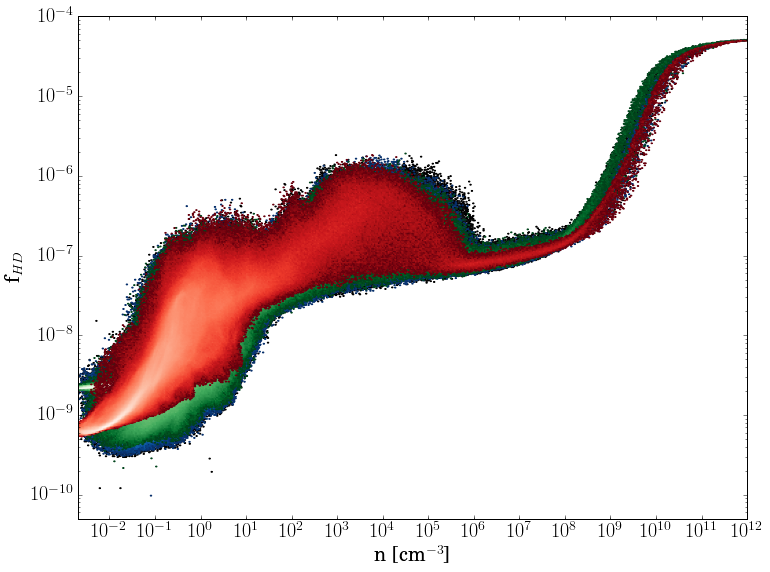

In [12]:
fig = plt.figure(3, figsize=(12,9))
ax = fig.add_subplot(111)
ax = pyGadget.multiplot.Phase.HDfrac(snapV,ax, cmap=plt.cm.Greys_r, rasterized=True)
ax = pyGadget.multiplot.Phase.HDfrac(snap1,ax, cmap=plt.cm.Blues_r, rasterized=True)
ax = pyGadget.multiplot.Phase.HDfrac(snap2,ax, cmap=plt.cm.Greens_r, rasterized=True)
ax = pyGadget.multiplot.Phase.HDfrac(snap3,ax, cmap=plt.cm.Reds_r, rasterized=True)

#ax0.text(.05,.1, r'J = 0', ha='left', va='top', size=25, transform=ax0.transAxes)
#ax1.text(.05,.1, r'J = J$_{0}$', ha='left', va='top', size=25, transform=ax1.transAxes)
#ax2.text(.05,.1, r'J = 10 J$_{0}$', ha='left', va='top', size=25, transform=ax2.transAxes)
#ax3.text(.05,.1, r'J = 100 J$_{0}$', ha='left', va='top', size=25, transform=ax3.transAxes)

fig.savefig('figures/phase_diagrams/HD-overlay'+tag+'.png', bbox_inches='tight')

## Combination Overlay

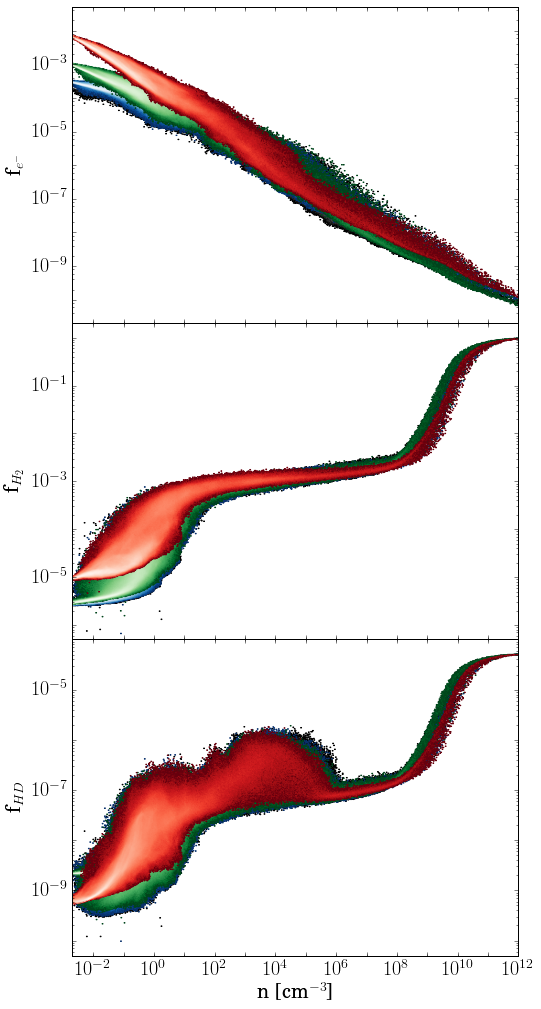

In [13]:
snaplist = [snapV, snap1, snap2, snap3]
fig, axarr = plt.subplots(3,1, sharex=True, figsize=(8,17))
for i,func in enumerate([pyGadget.multiplot.Phase.electron_frac, pyGadget.multiplot.Phase.h2frac, pyGadget.multiplot.Phase.HDfrac]):
    for j, colormap in enumerate([plt.cm.Greys_r, plt.cm.Blues_r, plt.cm.Greens_r, plt.cm.Reds_r]):
        axarr[i] = func(snaplist[j], axarr[i], cmap=colormap, rasterized=True)
        

#axarr[-1].set_xlabel('n [cm$^{-3}$]') 
plt.setp([a.get_yticklabels()[::2] for a in axarr], visible=False)
plt.setp(axarr[-1].get_xticklabels()[1::2], visible=False)
fig.subplots_adjust(hspace=0, wspace=0)
fig.savefig('figures/phase_diagrams/combo-overlay'+tag+'.png', bbox_inches='tight')

## Halo Temperature vs Radius

Center averaged over 4466 particles
Center averaged over all particles with density greater than 1.00e+08 particles/cc
Density averaged box center: 2.761e+03 2.757e+03 2.722e+03
Center averaged over 4466 particles
Center averaged over all particles with density greater than 1.00e+08 particles/cc
Density averaged box center: 2.981e-01 -3.840e-01 -5.619e-01
Center averaged over 3928 particles
Center averaged over all particles with density greater than 1.00e+08 particles/cc
Density averaged box center: 2.758e+03 2.754e+03 2.720e+03
Center averaged over 3928 particles
Center averaged over all particles with density greater than 1.00e+08 particles/cc
Density averaged box center: 4.021e-01 -3.521e-01 -6.322e-01
Center averaged over 4466 particles
Center averaged over all particles with density greater than 1.00e+08 particles/cc
Density averaged box center: 2.761e+03 2.757e+03 2.722e+03
Center averaged over 4466 particles
Center averaged over all particles with density greater than 1.00e+08 

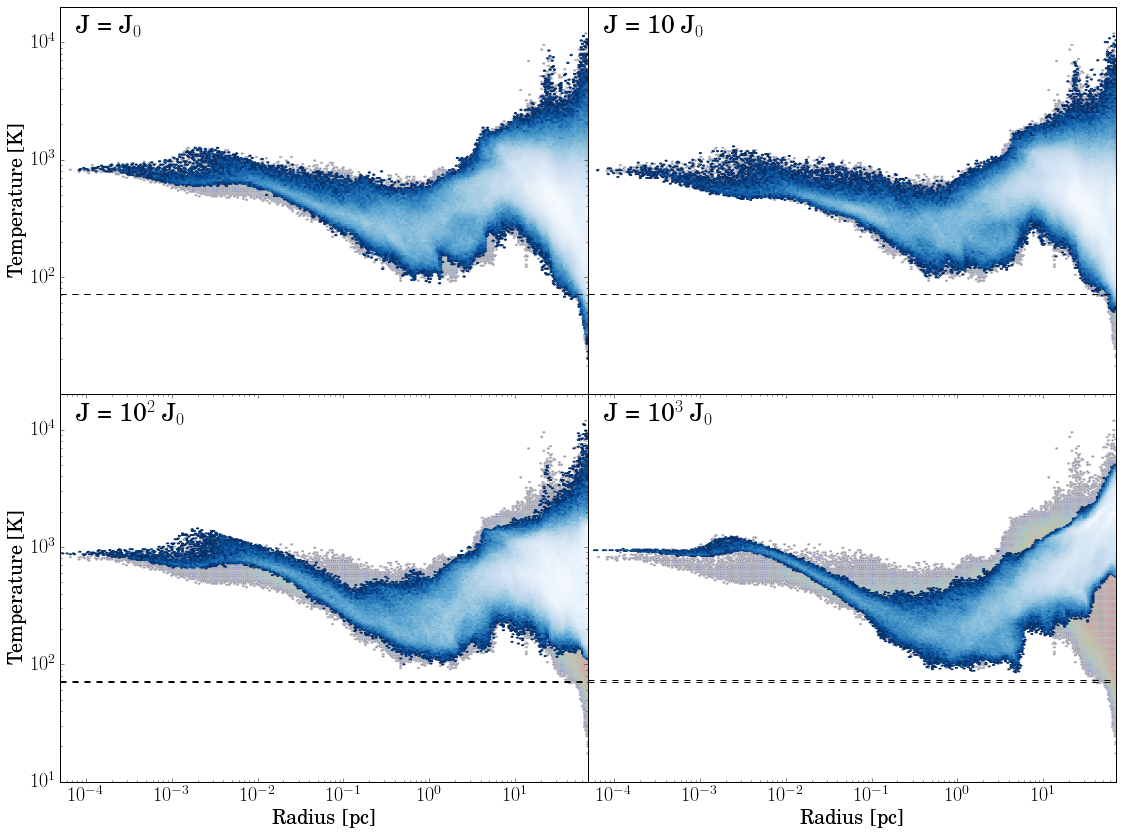

In [11]:
fig = plt.figure(2, figsize=(16,12))
ax0 = fig.add_subplot(221)
ax1 = fig.add_subplot(222)
ax2 = fig.add_subplot(223)
ax3 = fig.add_subplot(224)
for i, (ax, snap) in enumerate([(ax0,snap1), (ax1,snap2), (ax2,snap3), (ax3,snap4)]):
    ax = pyGadget.multiplot.Phase.radial_temp(snapV,ax, rasterized=True, color='.75')
    ax = pyGadget.multiplot.Phase.radial_temp(snap,ax, rasterized=True, cmap=plt.cm.Blues_r)
    ax.text(.03,.97, simname[name[i+1]], ha='left', va='top', size=25, transform=ax.transAxes)

ax0.xaxis.set_visible(False)
ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)
ax3.yaxis.set_visible(False)
ax0.set_yticks((1e2,1e3,1e4))
ax2.set_yticks((10,1e2,1e3,1e4))


plt.tight_layout(w_pad=0.0,h_pad=0.0)
fig.savefig('figures/phase_diagrams/radial_temp'+tag+'.png', bbox_inches='tight')